In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
import numpy as np

## Import and check results

In [2]:
answers_df = pd.read_csv('Example_Data_Aquisition.csv', sep=';', header=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(answers_df)


   1_Participant_ID  2_Age  3_Mood  4_Option  5_Motivation  6_German  \
0                 1     22       0         0             0         0   
1                 2     23       1         2             1         1   
2                 3     27       1         1             1         1   
3                 4     25       0         1             0         1   

   7_time_page_land  8_first_hint_land  9_Difficulty_land  10_Interface_land  \
0                20                  0                  0                  0   
1                10                  1                  2                  1   
2                 5                  1                  4                  2   
3                 2                  0                  1                  3   

   11_Readability  12_Map_colors_land  13_Buttons_land  14_Style_land  \
0               0                   0                4              1   
1               2                   1                4              2   
2               2  

In [3]:
answers_df.head()

,1_Participant_ID,2_Age,3_Mood,4_Option,5_Motivation,6_German,7_time_page_land,8_first_hint_land,9_Difficulty_land,10_Interface_land,...,31_18_exploration_city,31_19_names_city,31_20_material_city,31_21_interest_city,31_22_mental_city,31_23_pressure_city,31_24_success_city,31_25_satisfaction_city,31_26_insecure_city,32_Comments
0,1,22,0,0,0,0,20,0,0,0,...,1,3,0,0,2,2,4,3,2,no
1,2,23,1,2,1,1,10,1,2,1,...,1,2,4,1,3,3,4,2,1,no
2,3,27,1,1,1,1,5,1,4,2,...,2,3,4,2,2,2,4,3,1,no
3,4,25,0,1,0,1,2,0,1,3,...,2,2,4,1,3,3,4,3,1,no


# 1 General Infromation

### Question 2

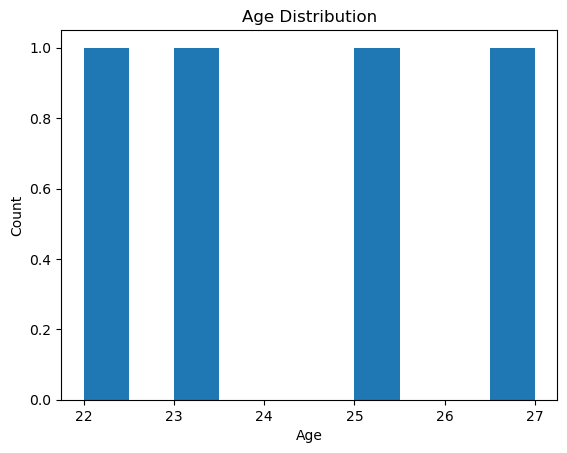

In [6]:
plt.hist(answers_df['2_Age'], bins=10)  
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Question 3


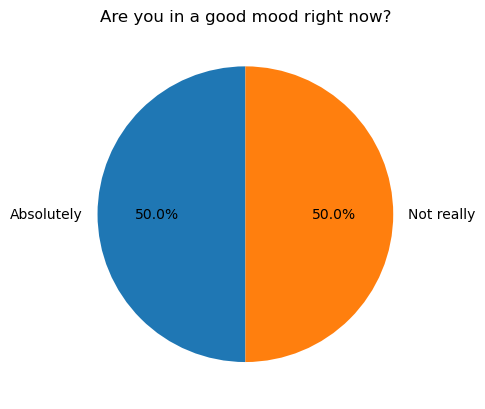

In [7]:
sizes = answers_df['3_Mood'].value_counts()
labels = sizes.index.map({0: 'Absolutely', 1: 'Not really'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Are you in a good mood right now?')
plt.show()

### Question 4

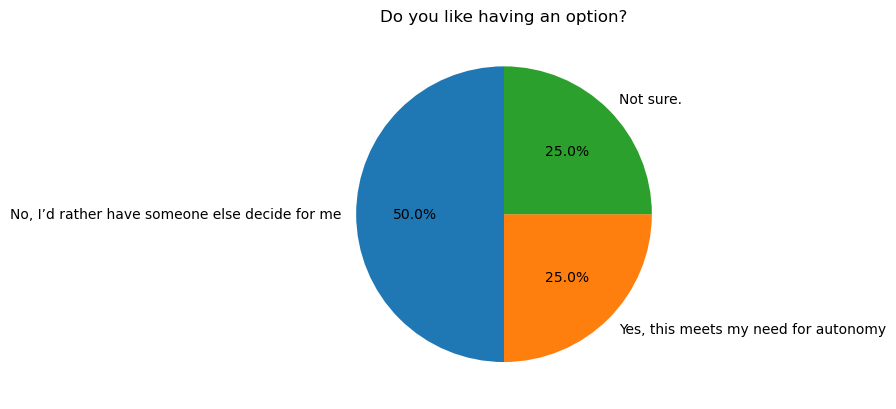

In [8]:
sizes = answers_df['4_Option'].value_counts()
labels = sizes.index.map({0: 'Yes, this meets my need for autonomy', 1: 'No, I’d rather have someone else decide for me', 2: 'Not sure.'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Do you like having an option?')
plt.show()

### Question 5

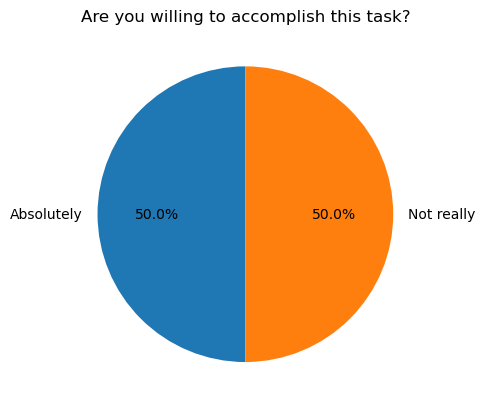

In [9]:
sizes = answers_df['5_Motivation'].value_counts()
labels = sizes.index.map({0: 'Absolutely', 1: 'Not really'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Are you willing to accomplish this task?')
plt.show()

### Question 6

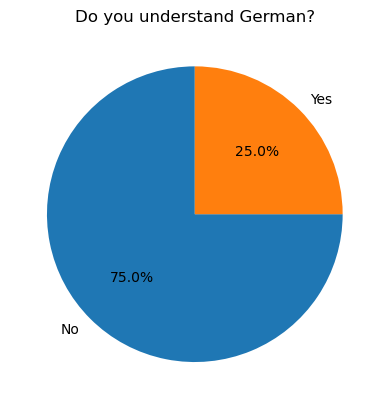

In [10]:
sizes = answers_df['6_German'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Do you understand German?')
plt.show()

# 2 First Impact

### Question 7 and 15

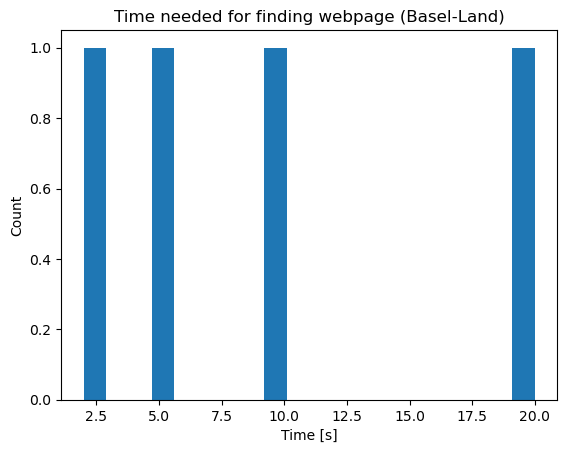

Average time needed (Basel-Land)
9.25
Meadian time needed (Basel-Land)
7.5
Standard deviation of time needed (Basel Land)
7.88986691902975
Min time needed (Basel-Land)
2
Max time needed (Basel-Land)
20


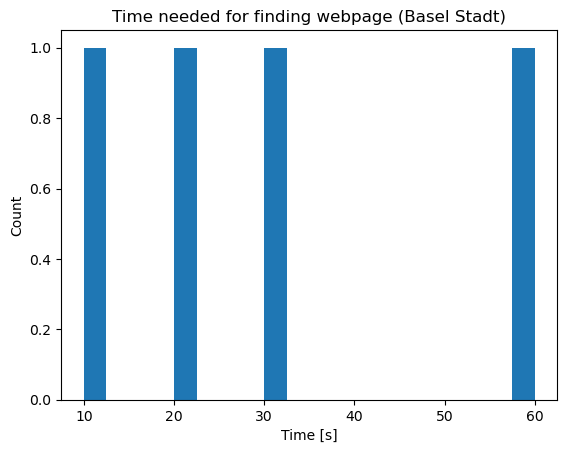

Average time needed (Basel-Stadt)
30.5
Meadian time needed (Basel-Stadt)
26.0
Standard deviation of time needed (Basel Stadt)
21.31509637166422
Min time needed (Basel-Stadt)
10
Max time needed (Basel-Stadt)
60



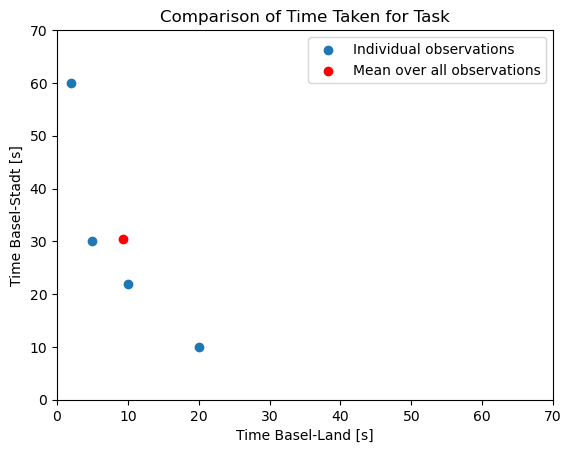

Correlation coefficient of time needed:  -0.8691432557455736

Wilcoxon signed-rank test:
  statistic = 1.000
  p-value = 0.250

Paired t-test:
  statistic = -1.494
  p-value = 0.232


In [129]:
plt.hist(answers_df['7_time_page_land'], bins=20)  
plt.title('Time needed for finding webpage (Basel-Land)')
plt.xlabel('Time [s]')
plt.ylabel('Count')
plt.show()

print("Average time needed (Basel-Land)")
print(answers_df['7_time_page_land'].mean())
print("Meadian time needed (Basel-Land)")
print(answers_df['7_time_page_land'].median())
print("Standard deviation of time needed (Basel Land)")
print(answers_df['7_time_page_land'].std())
print("Min time needed (Basel-Land)")
print(answers_df['7_time_page_land'].min())
print("Max time needed (Basel-Land)")
print(answers_df['7_time_page_land'].max())

plt.hist(answers_df['15_time_page_city'], bins=20)  
plt.title('Time needed for finding webpage (Basel Stadt)')
plt.xlabel('Time [s]')
plt.ylabel('Count')
plt.show()

print("Average time needed (Basel-Stadt)")
print(answers_df['15_time_page_city'].mean())
print("Meadian time needed (Basel-Stadt)")
print(answers_df['15_time_page_city'].median())
print("Standard deviation of time needed (Basel Stadt)")
print(answers_df['15_time_page_city'].std())
print("Min time needed (Basel-Stadt)")
print(answers_df['15_time_page_city'].min())
print("Max time needed (Basel-Stadt)")
print(answers_df['15_time_page_city'].max())
print("")

# create a scatterplot of "Time Basel a" vs "Time Basel B"
plt.scatter(answers_df["7_time_page_land"], answers_df["15_time_page_city"], label = "Individual observations")
plt.scatter(answers_df["7_time_page_land"].mean(), answers_df["15_time_page_city"].mean(), color = "red", label = "Mean over all observations")
plt.legend()
# set the axis labels and title
plt.xlabel("Time Basel-Land [s]")
plt.ylabel("Time Basel-Stadt [s]")
plt.title("Comparison of Time Taken for Task")
plt.xlim(0, 70)
plt.ylim(0, 70)



# show the plot
plt.show()

corr = answers_df["7_time_page_land"].corr(answers_df["15_time_page_city"])

# print the correlation coefficient
print("Correlation coefficient of time needed: ", corr)
print("")
# Wilcoxon signed-rank test
stat, p = wilcoxon(answers_df["7_time_page_land"], answers_df["15_time_page_city"])

# print the results
print("Wilcoxon signed-rank test:")
print(f"  statistic = {stat:.3f}")
print(f"  p-value = {p:.3f}")
print("")

# perform the paired t-test
stat, p = ttest_rel(answers_df["7_time_page_land"], answers_df["15_time_page_city"])

# print the results
print("Paired t-test:")
print(f"  statistic = {stat:.3f}")
print(f"  p-value = {p:.3f}")

In [20]:
from scipy.stats import wilcoxon

# Wilcoxon signed-rank test
stat, p = wilcoxon(answers_df["7_time_page_land"], answers_df["15_time_page_city"])

# print the results
print("Wilcoxon signed-rank test:")
print(f"  statistic = {stat:.3f}")
print(f"  p-value = {p:.3f}")

Wilcoxon signed-rank test:
  statistic = 1.000
  p-value = 0.250


### Question 8 and 16

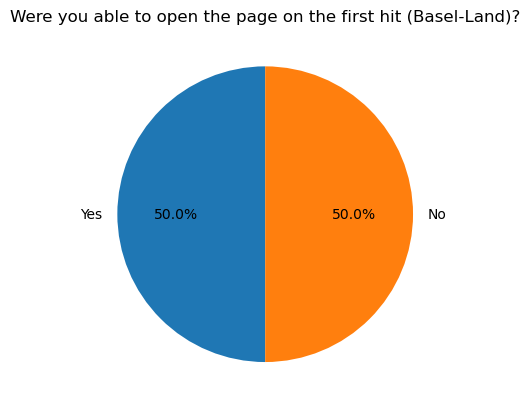

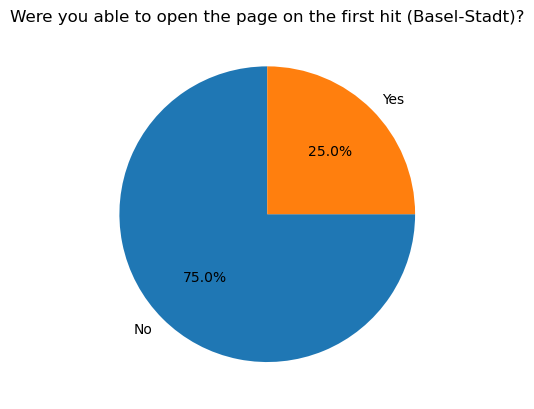

In [66]:
sizes = answers_df['8_first_hint_land'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Were you able to open the page on the first hit (Basel-Land)?')
plt.show()

sizes = answers_df['16_first_hint_city'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Were you able to open the page on the first hit (Basel-Stadt)?')
plt.show()

### Question 9 and 17

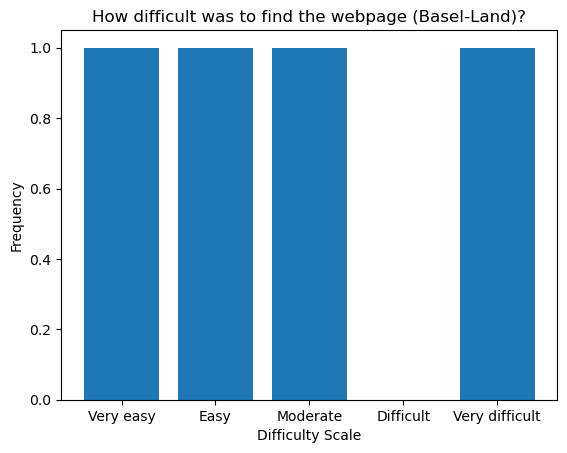

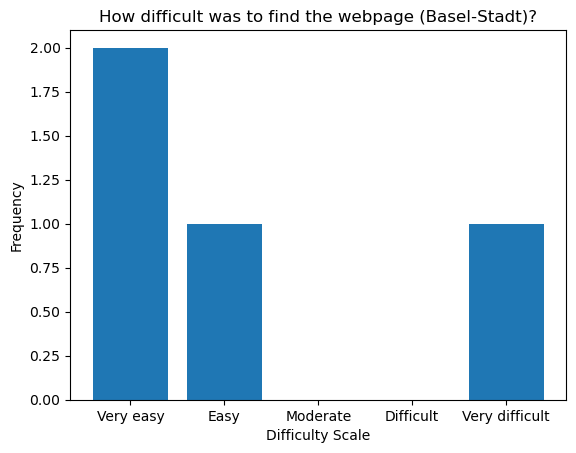

In [71]:
counts = answers_df['9_Difficulty_land'].value_counts().sort_index()
plt.bar(counts.index, counts)
plt.xlabel('Difficulty Scale')
plt.ylabel('Frequency')
plt.title('How difficult was to find the webpage (Basel-Land)?')
plt.xticks([0, 1, 2, 3, 4], ['Very easy', 'Easy', 'Moderate', 'Difficult', 'Very difficult'])
plt.show()

counts = answers_df['17_Difficulty_city'].value_counts().sort_index()
plt.bar(counts.index, counts)
plt.xlabel('Difficulty Scale')
plt.ylabel('Frequency')
plt.title('How difficult was to find the webpage (Basel-Stadt)?')
plt.xticks([0, 1, 2, 3, 4], ['Very easy', 'Easy', 'Moderate', 'Difficult', 'Very difficult'])
plt.show()

### Question 10 and 18

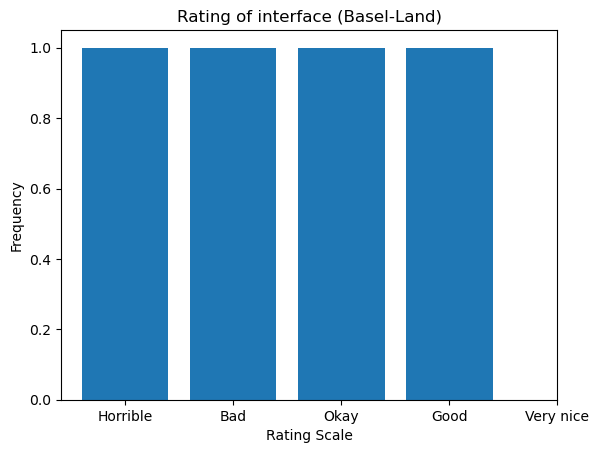

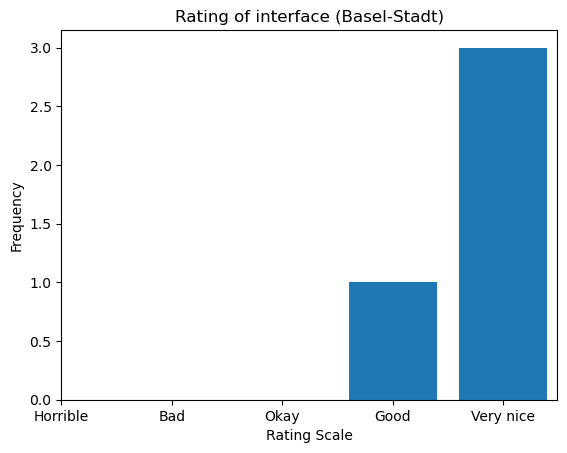

In [72]:
counts = answers_df['10_Interface_land'].value_counts().sort_index()
plt.bar(counts.index, counts)
plt.xlabel('Rating Scale')
plt.ylabel('Frequency')
plt.title('Rating of interface (Basel-Land)')
plt.xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.show()

counts = answers_df['18_Interface_city'].value_counts().sort_index()
plt.bar(counts.index, counts)
plt.xlabel('Rating Scale')
plt.ylabel('Frequency')
plt.title('Rating of interface (Basel-Stadt)')
plt.xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.show()

### Question 11 and 19

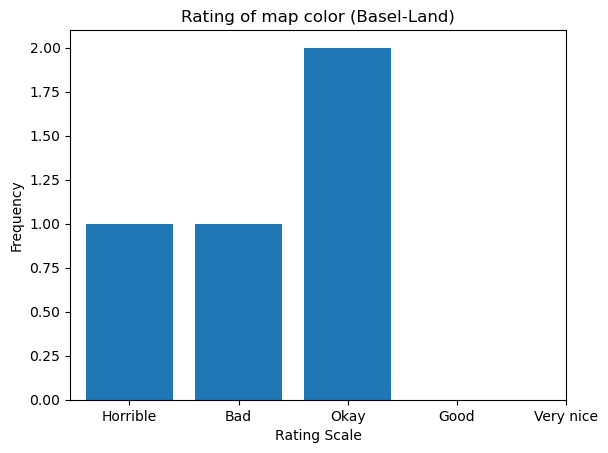

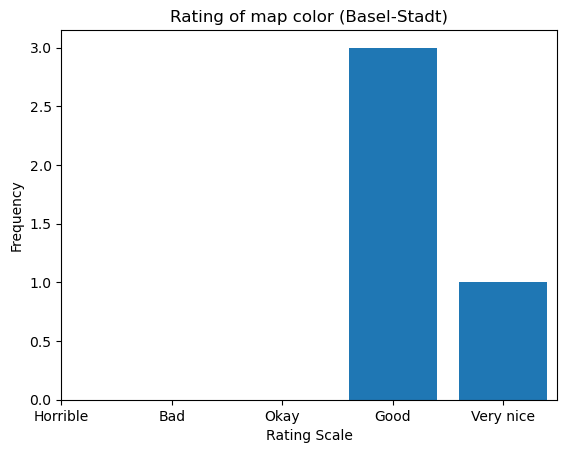

In [73]:
counts = answers_df['11_Readability'].value_counts().sort_index()
plt.bar(counts.index, counts)
plt.xlabel('Rating Scale')
plt.ylabel('Frequency')
plt.title('Rating of map color (Basel-Land)')
plt.xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.show()

counts = answers_df['19_Readability'].value_counts().sort_index()
plt.bar(counts.index, counts)
plt.xlabel('Rating Scale')
plt.ylabel('Frequency')
plt.title('Rating of map color (Basel-Stadt)')
plt.xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.show()

### Question 12 and 20

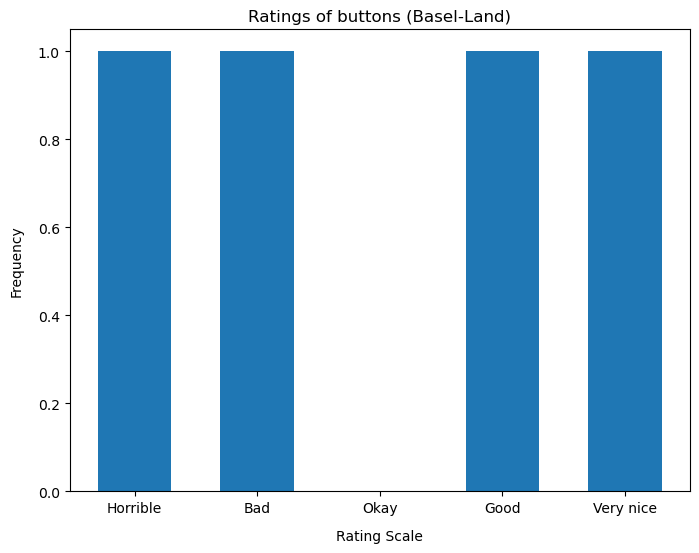

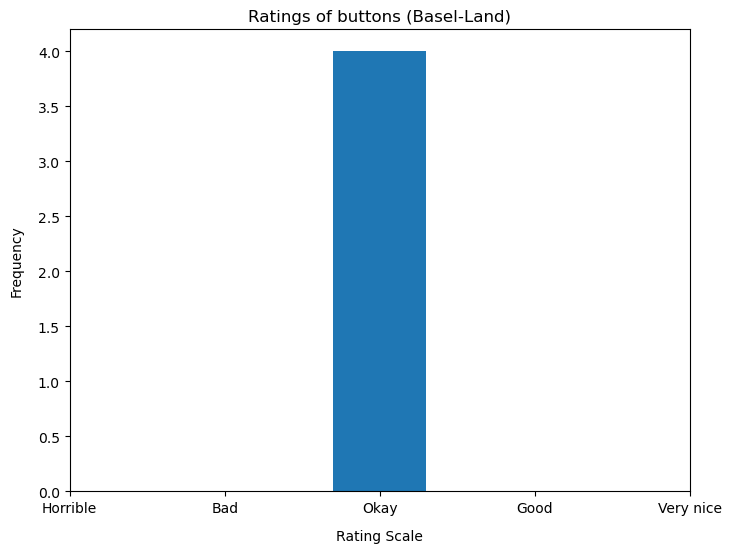

In [74]:
counts = answers_df['12_Map_colors_land'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts, width=0.6)
ax.set_xlabel('Rating Scale', labelpad=10)
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Ratings of buttons (Basel-Land)')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.subplots_adjust(wspace=0.5)
plt.show()

counts = answers_df['20_Map_colors_city'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts, width=0.6)
ax.set_xlabel('Rating Scale', labelpad=10)
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Ratings of buttons (Basel-Land)')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.subplots_adjust(wspace=0.5)
plt.show()

### Question 13 and 21

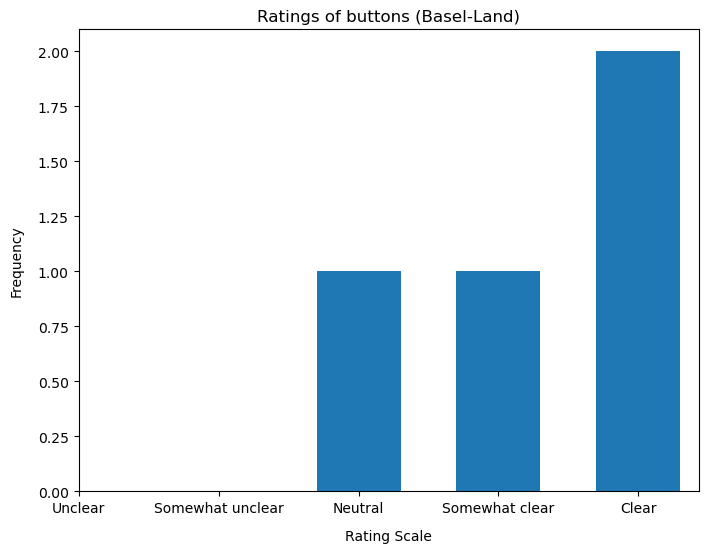

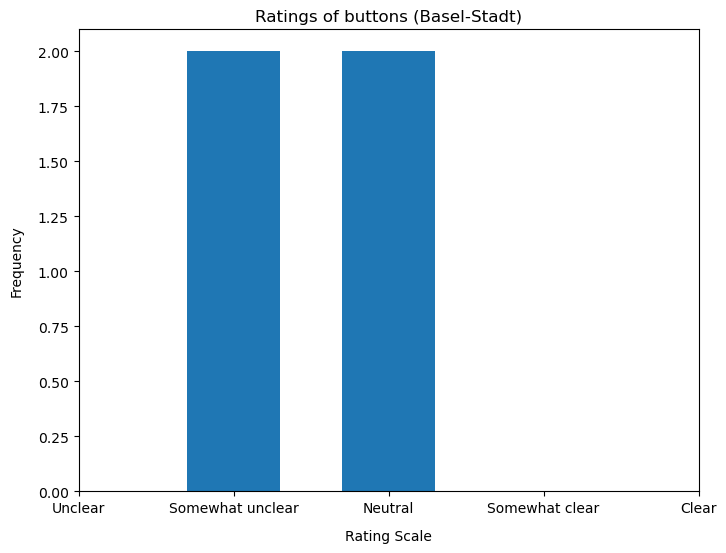

In [55]:
counts = answers_df['13_Buttons_land'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts, width=0.6)
ax.set_xlabel('Rating Scale', labelpad=10)
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Ratings of buttons (Basel-Land)')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Unclear', 'Somewhat unclear', 'Neutral', 'Somewhat clear', 'Clear'])
plt.subplots_adjust(wspace=0.5)
plt.show()

counts = answers_df['21_Buttons_city'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts, width=0.6)
ax.set_xlabel('Rating Scale', labelpad=10)
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Ratings of buttons (Basel-Stadt)')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Unclear', 'Somewhat unclear', 'Neutral', 'Somewhat clear', 'Clear'])
plt.subplots_adjust(wspace=0.5)
plt.show()

### Question 14 and 22

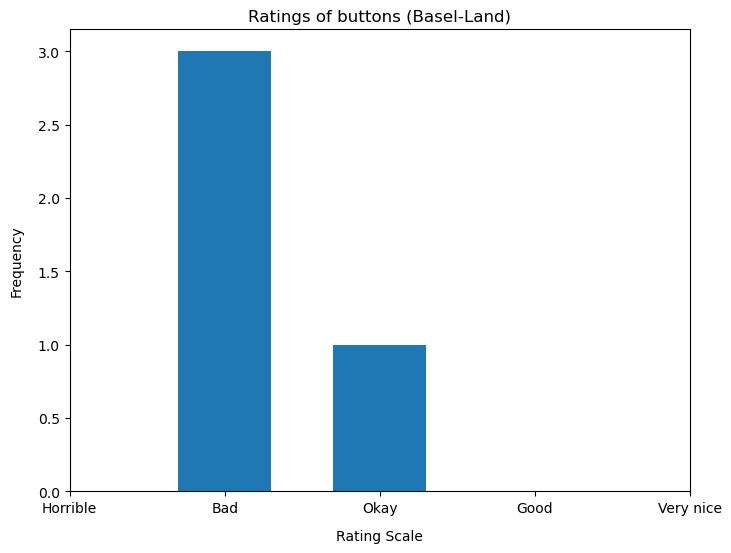

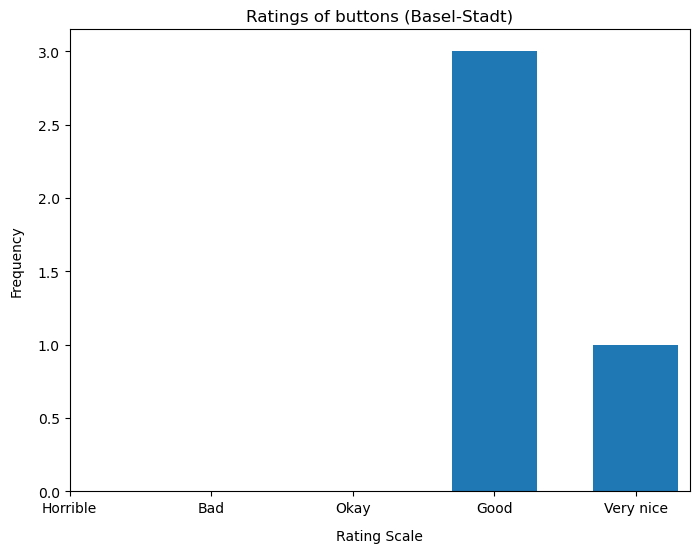

In [60]:
counts = answers_df['14_Style_land'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts, width=0.6)
ax.set_xlabel('Rating Scale', labelpad=10)
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Ratings of buttons (Basel-Land)')
ax.set_xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.subplots_adjust(wspace=0.5)
plt.show()

counts = answers_df['22_Style_city'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts, width=0.6)
ax.set_xlabel('Rating Scale', labelpad=10)
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Ratings of buttons (Basel-Stadt)')
ax.set_xticks([0, 1, 2, 3, 4], ['Horrible', 'Bad', 'Okay', 'Good', 'Very nice'])
plt.subplots_adjust(wspace=0.5)
plt.show()

### Get overall score

Average score Basel-Land total:  1.8333333333333333
Average score Basel-Stadt total:  2.5
Score Basel-Land by category:  9_Difficulty_land     1.75
10_Interface_land     1.50
11_Readability        1.25
12_Map_colors_land    2.00
13_Buttons_land       3.25
14_Style_land         1.25
dtype: float64
Average score Basel-Stadt by category:  17_Difficulty_city    1.25
18_Interface_city     3.75
19_Readability        3.25
20_Map_colors_city    2.00
21_Buttons_city       1.50
22_Style_city         3.25
dtype: float64


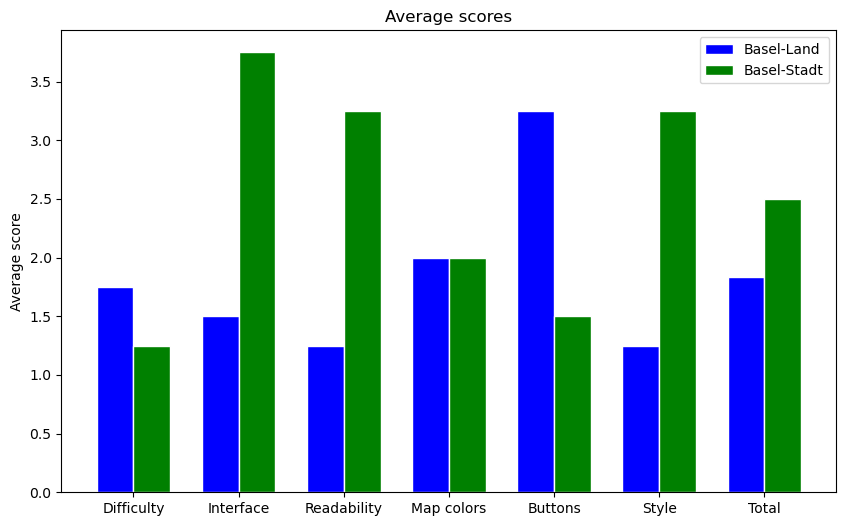

In [120]:
mean_land = answers_df[['9_Difficulty_land','10_Interface_land',
            '11_Readability','12_Map_colors_land',
            '13_Buttons_land','14_Style_land']].mean()


mean_city = answers_df[['17_Difficulty_city','18_Interface_city',
            '19_Readability','20_Map_colors_city',
            '21_Buttons_city','22_Style_city']].mean()

sum_land = answers_df[['9_Difficulty_land','10_Interface_land',
            '11_Readability','12_Map_colors_land',
            '13_Buttons_land','14_Style_land']].sum()

sum_city = answers_df[['17_Difficulty_city','18_Interface_city',
            '19_Readability','20_Map_colors_city',
            '21_Buttons_city','22_Style_city']].sum()

print("Average score Basel-Land total: ", sum_land.sum() / (4*6))
print("Average score Basel-Stadt total: ", sum_city.sum() / (4*6))
print("Score Basel-Land by category: ", mean_land)
print("Average score Basel-Stadt by category: ", mean_city)

plt.figure(figsize=(10, 6))

# Define the categories and their scores
categories = ['Difficulty', 'Interface', 'Readability', 'Map colors', 'Buttons', 'Style', 'Total']
scores_land = list(mean_land.values) + [sum_land.sum() / (4*6)]
scores_city = list(mean_city.values) + [sum_city.sum() / (4*6)]

# Set the bar width and positions
bar_width = 0.35
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.bar(r1, scores_land, color='b', width=bar_width, edgecolor='white', label='Basel-Land')
plt.bar(r2, scores_city, color='g', width=bar_width, edgecolor='white', label='Basel-Stadt')

# Add some labels and formatting
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)
plt.ylabel('Average score')
plt.title('Average scores')
plt.legend()

# Show the plot
plt.show()



# Perform a Task

### Question 23

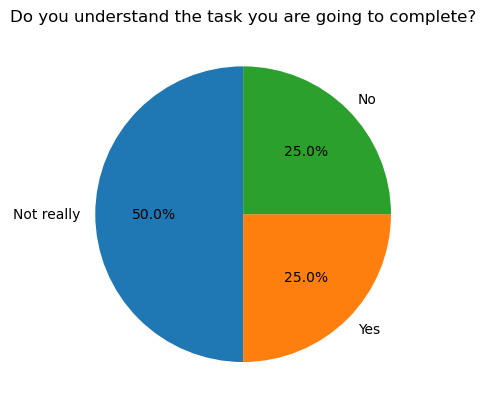

In [61]:
sizes = answers_df['23_understanding_task'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'Not really',2: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Do you understand the task you are going to complete?')
plt.show()

### Question 24 and 25

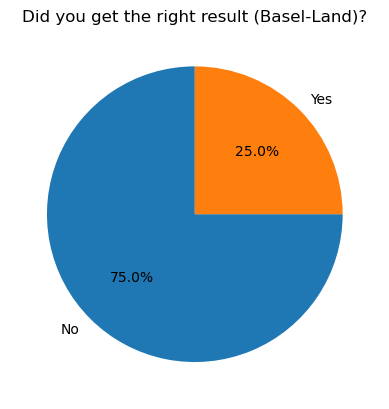

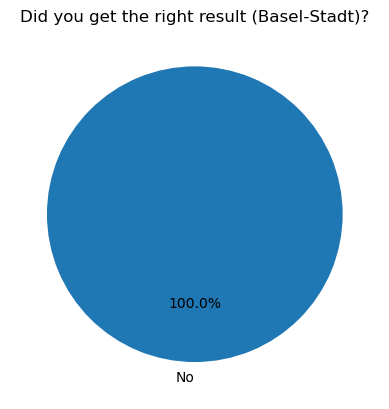

In [64]:
sizes = answers_df['24_completion_land'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Did you get the right result (Basel-Land)?')
plt.show()

sizes = answers_df['24_completion_city'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Did you get the right result (Basel-Stadt)?')
plt.show()

### Question 26 and 27

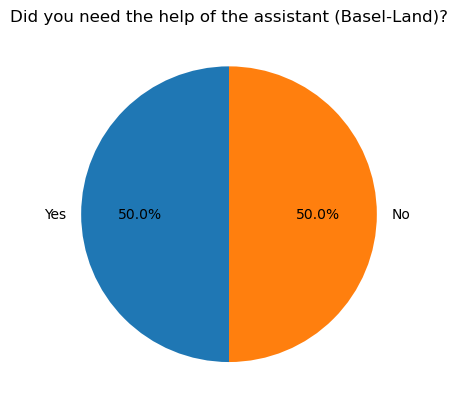

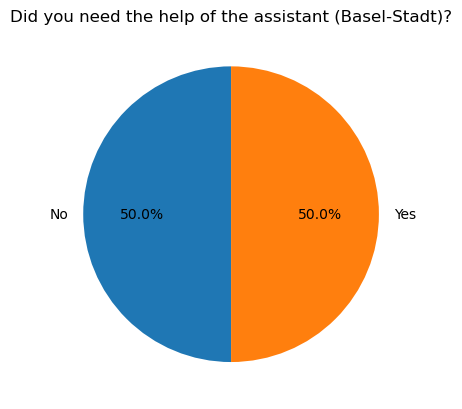

In [76]:
sizes = answers_df['26_help_land'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Did you need the help of the assistant (Basel-Land)?')
plt.show()

sizes = answers_df['27_help_city'].value_counts()
labels = sizes.index.map({0: 'Yes', 1: 'No'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Did you need the help of the assistant (Basel-Stadt)?')
plt.show()

### Question 28 and 29

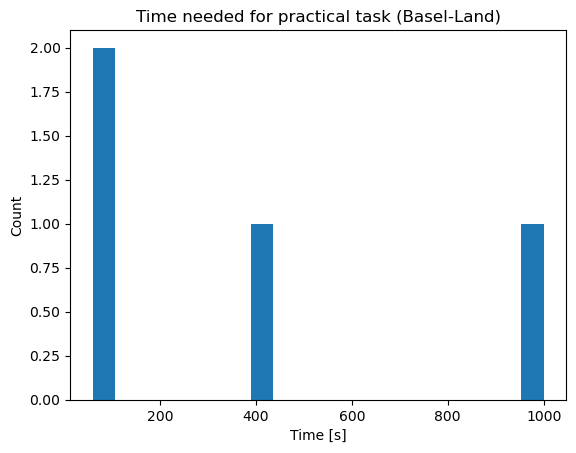

Average time needed (Basel-Land)
390.0
Meadian time needed (Basel-Land)
250.0
Standard deviation of time needed (Basel Land)
434.0506882842141
Min time needed (Basel-Land)
60
Max time needed (Basel-Land)
1000


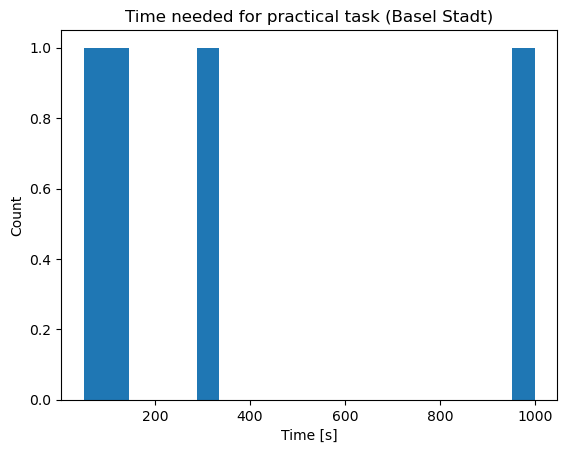

Average time needed (Basel-Stadt)
362.5
Meadian time needed (Basel-Stadt)
200.0
Standard deviation of time needed (Basel Stadt)
438.5107372307623
Min time needed (Basel-Stadt)
50
Max time needed (Basel-Stadt)
1000



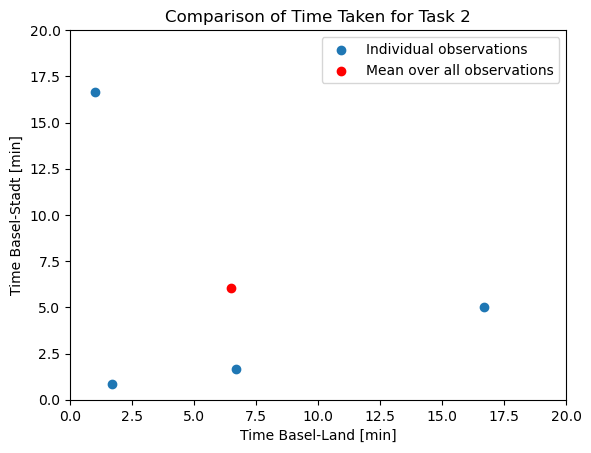

Correlation coefficient of time needed:  -0.2810820426704428

Wilcoxon signed-rank test:
  statistic = 4.000
  p-value = 0.875

Paired t-test:
  statistic = 0.079
  p-value = 0.942


In [130]:
plt.hist(answers_df['28_time_land'], bins=20)  
plt.title('Time needed for practical task (Basel-Land)')
plt.xlabel('Time [s]')
plt.ylabel('Count')
plt.show()

print("Average time needed (Basel-Land)")
print(answers_df['28_time_land'].mean())
print("Meadian time needed (Basel-Land)")
print(answers_df['28_time_land'].median())
print("Standard deviation of time needed (Basel Land)")
print(answers_df['28_time_land'].std())
print("Min time needed (Basel-Land)")
print(answers_df['28_time_land'].min())
print("Max time needed (Basel-Land)")
print(answers_df['28_time_land'].max())

plt.hist(answers_df['29_time_city'], bins=20)  
plt.title('Time needed for practical task (Basel Stadt)')
plt.xlabel('Time [s]')
plt.ylabel('Count')
plt.show()

print("Average time needed (Basel-Stadt)")
print(answers_df['29_time_city'].mean())
print("Meadian time needed (Basel-Stadt)")
print(answers_df['29_time_city'].median())
print("Standard deviation of time needed (Basel Stadt)")
print(answers_df['29_time_city'].std())
print("Min time needed (Basel-Stadt)")
print(answers_df['29_time_city'].min())
print("Max time needed (Basel-Stadt)")
print(answers_df['29_time_city'].max())
print("")

plt.scatter(answers_df["28_time_land"] / 60, answers_df["29_time_city"] / 60, label = "Individual observations")
plt.scatter(answers_df["28_time_land"].mean() / 60, answers_df["29_time_city"].mean() / 60, color = "red", label = "Mean over all observations")
plt.legend()
plt.xlabel("Time Basel-Land [min]")
plt.ylabel("Time Basel-Stadt [min]")
plt.title("Comparison of Time Taken for Task 2")
plt.xlim(0, 20)
plt.ylim(0, 20)

# show the plot
plt.show()

corr = answers_df["28_time_land"].corr(answers_df["29_time_city"])

# print the correlation coefficient
print("Correlation coefficient of time needed: ", corr)
print("")

# Wilcoxon signed-rank test
stat, p = wilcoxon(answers_df["28_time_land"], answers_df["29_time_city"])

# print the results
print("Wilcoxon signed-rank test:")
print(f"  statistic = {stat:.3f}")
print(f"  p-value = {p:.3f}")
print("")
# perform the paired t-test
stat, p = ttest_rel(answers_df["28_time_land"], answers_df["29_time_city"])

# print the results
print("Paired t-test:")
print(f"  statistic = {stat:.3f}")
print(f"  p-value = {p:.3f}")

### Question 30

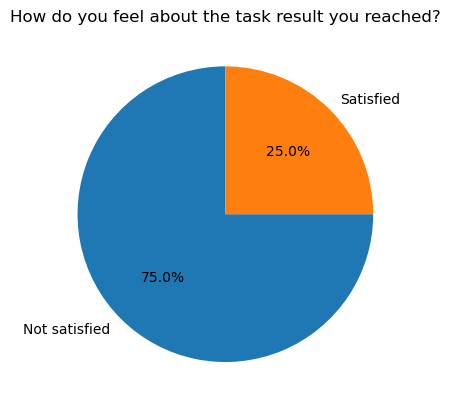

In [87]:
sizes = answers_df['30_Satisfaction'].value_counts()
labels = sizes.index.map({0: 'Satisfied', 1: 'Not satisfied'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('How do you feel about the task result you reached?')
plt.show()

### Question 31

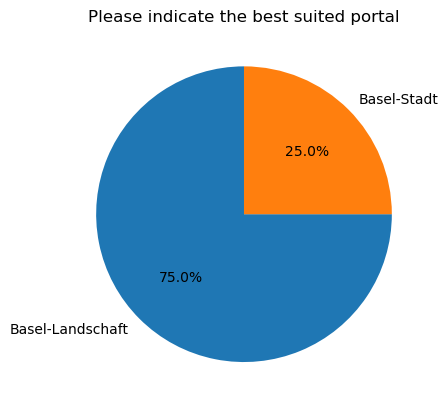

In [88]:
sizes = answers_df['31_Best'].value_counts()
labels = sizes.index.map({0: 'Basel-Stadt', 1: 'Basel-Landschaft'}.get)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Please indicate the best suited portal')
plt.show()

Average score Basel-Land total:  3.9583333333333335
Average score Basel-Stadt total:  4.166666666666667
Score Basel-Land by category:  31_1_readability_land      1.50
31_2_clear_land            3.00
31_3_interactive_land      2.00
31_4_learning_land         2.50
31_5_exploration_land      1.00
31_6_names_land            2.00
31_7_material_land         2.50
31_8_interest_land         2.50
31_9_mental_land           2.00
31_10_pressure_land        1.00
31_11_success_land         2.75
31_12_satisfaction_land    0.00
31_13_insecure_land        1.00
dtype: float64
Average score Basel-Stadt by category:  31_14_readability_city     1.00
31_15_clear_city           0.75
31_16_interactive_city     1.25
31_17_learning_city        1.00
31_18_exploration_city     1.50
31_19_names_city           2.50
31_20_material_city        3.00
31_21_interest_city        1.00
31_22_mental_city          2.50
31_23_pressure_city        2.50
31_24_success_city         4.00
31_25_satisfaction_city    2.75
31_26_inse

C:\Users\domin\AppData\Local\Temp\ipykernel_18100\3351829397.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xticks)


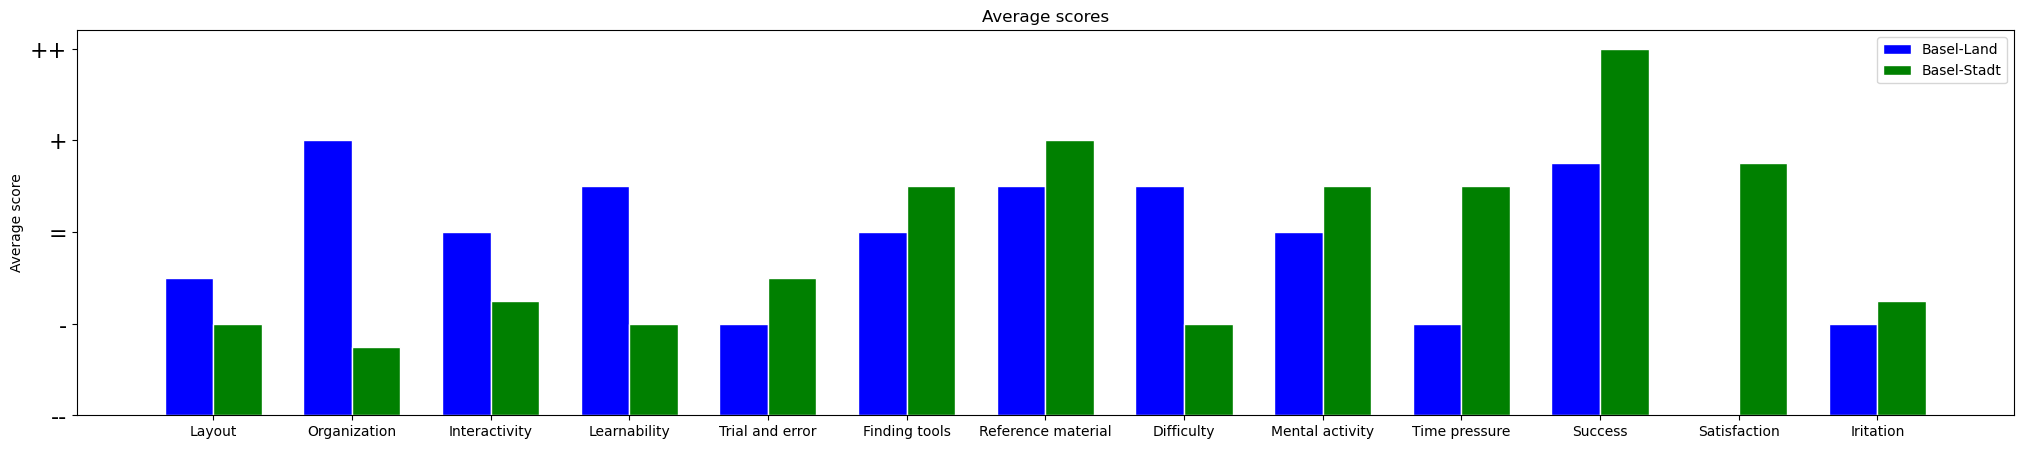

In [145]:
mean_land = answers_df[['31_1_readability_land','31_2_clear_land',
            '31_3_interactive_land','31_4_learning_land',
            '31_5_exploration_land','31_6_names_land',
            '31_7_material_land','31_8_interest_land',
            '31_9_mental_land','31_10_pressure_land',
            '31_11_success_land','31_12_satisfaction_land',
            '31_13_insecure_land']].mean()


mean_city = answers_df[['31_14_readability_city','31_15_clear_city',
            '31_16_interactive_city','31_17_learning_city',
            '31_18_exploration_city','31_19_names_city',
            '31_20_material_city','31_21_interest_city',
            '31_22_mental_city','31_23_pressure_city',
            '31_24_success_city','31_25_satisfaction_city',
            '31_26_insecure_city']].mean()

sum_land = answers_df[['31_1_readability_land','31_2_clear_land',
            '31_3_interactive_land','31_4_learning_land',
            '31_5_exploration_land','31_6_names_land',
            '31_7_material_land','31_8_interest_land',
            '31_9_mental_land','31_10_pressure_land',
            '31_11_success_land','31_12_satisfaction_land',
            '31_13_insecure_land']].sum()

sum_city = answers_df[['31_14_readability_city','31_15_clear_city',
            '31_16_interactive_city','31_17_learning_city',
            '31_18_exploration_city','31_19_names_city',
            '31_20_material_city','31_21_interest_city',
            '31_22_mental_city','31_23_pressure_city',
            '31_24_success_city','31_25_satisfaction_city',
            '31_26_insecure_city']].sum()

print("Average score Basel-Land total: ", sum_land.sum() / (4*6))
print("Average score Basel-Stadt total: ", sum_city.sum() / (4*6))
print("Score Basel-Land by category: ", mean_land)
print("Average score Basel-Stadt by category: ", mean_city)

plt.figure(figsize=(25, 5))

# Define the categories and their scores
categories = ['Layout', 'Organization', 'Interactivity', 'Learnability', 'Trial and error','Finding tools','Reference material','Difficulty','Mental activity','Time pressure','Success', 'Satisfaction', 'Iritation']
scores_land = list(mean_land.values) 
scores_city = list(mean_city.values) 

# Set the bar width and positions
bar_width = 0.35
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.bar(r1, scores_land, color='b', width=bar_width, edgecolor='white', label='Basel-Land')
plt.bar(r2, scores_city, color='g', width=bar_width, edgecolor='white', label='Basel-Stadt')
xticks_dict = {0: '--', 1: '-', 2: '=', 3: '+', 4: '++'}
xticks = [xticks_dict[i] for i in range(5)]
ax.set_yticklabels(xticks)

plt.yticks([0,1,2,3,4], xticks)
plt.gca().tick_params(axis='y', labelsize=16)
# Add some labels and formatting
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)
plt.ylabel('Average score')
plt.title('Average scores')
plt.legend()

# Show the plot
plt.show()